# 十四.基于OpenCV和像素处理的图像灰度化处理

本篇文章讲解图像灰度化处理的知识，结合OpenCV调用cv2.cvtColor()函数实现图像灰度操作，使用像素处理方法对图像进行灰度化处理。

1.图像灰度化原理

2.基于OpenCV的图像灰度化处理

3.基于像素操作的图像灰度化处理


## 14.1图像灰度化原理

像灰度化是将一幅彩色图像转换为灰度化图像的过程。彩色图像通常包括R、G、B三个分量，分别显示出红绿蓝等各种颜色，灰度化就是使彩色图像的R、G、B三个分量相等的过程。

灰度图像中每个像素仅具有一种样本颜色，其灰度是位于黑色与白色之间的多级色彩深度，灰度值大的像素点比较亮，反之比较暗，像素值最大为255（表示白色），像素值最小为0（表示黑色）。假设某点的颜色由RGB(R,G,B)组成，常见灰度处理算法如下表所示：


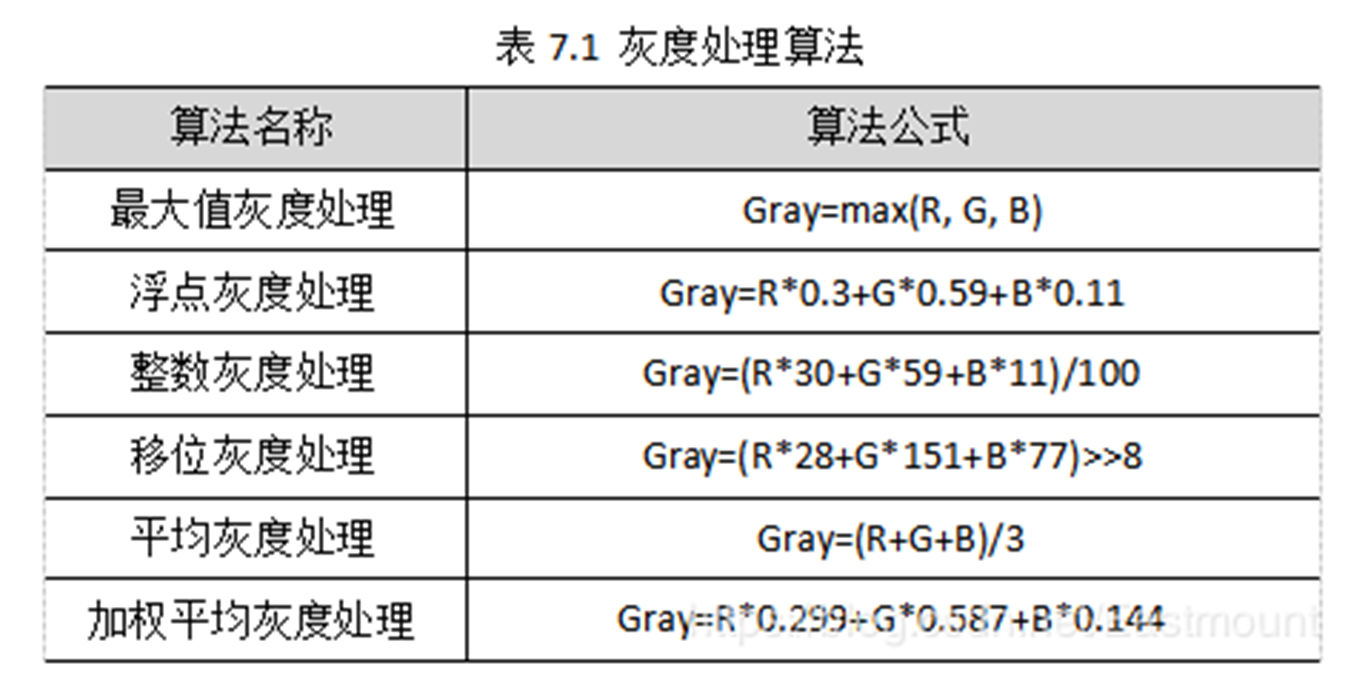

上表中Gray表示灰度处理之后的颜色，然后将原始RGB(R,G,B)颜色均匀地替换成新颜色RGB(Gray,Gray,Gray)，从而将彩色图片转化为灰度图像。

一种常见的方法是将RGB三个分量求和再取平均值，但更为准确的方法是设置不同的权重，将RGB分量按不同的比例进行灰度划分。比如人类的眼睛感官蓝色的敏感度最低，敏感最高的是绿色，因此将RGB按照0.299、0.587、0.144比例加权平均能得到较合理的灰度图像，如下所示。



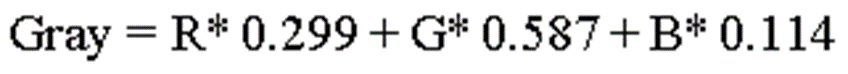

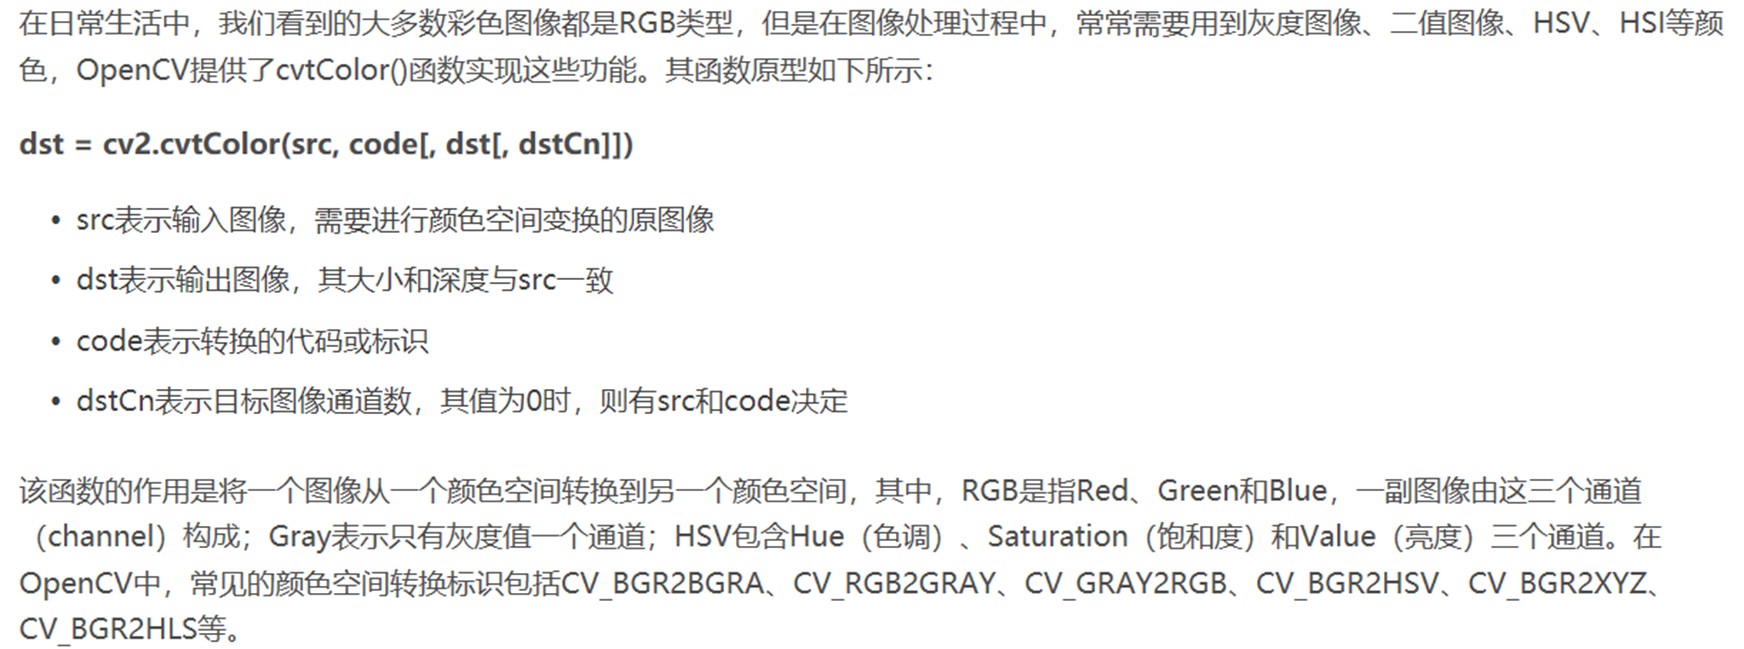

下面是调用cvtColor()函数将图像
进行灰度化处理的代码


In [ ]:
import cv2  
import numpy as np  

#读取原始图片
src = cv2.imread('test.jpg')

#图像灰度化处理
grayImage = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

#显示图像
cv2.imshow("src", src)
cv2.imshow("result", grayImage)

#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()


输出结果如上图所示，左边是彩色原图，右边是将彩色图像进行灰度化处理之后的灰度图。
其中，灰度图将一个像素点的三个颜色变量设置为相当，R=G=B，此时该值称为灰度值。


同样，可以调用 grayImage = cv2.cvtColor(src, cv2.COLOR_BGR2HSV) 
核心代码将彩色图像转换为HSV颜色空间，
如下图所示。


In [ ]:
import cv2  
import numpy as np  

#读取原始图片
src = cv2.imread('test.jpg')

#图像灰度化处理
grayImage = cv2.cvtColor(src, cv2.COLOR_BGR2HSV) 

#显示图像
cv2.imshow("src", src)
cv2.imshow("result", grayImage)

#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()


## 14.2基于OpenCV的图像灰度化处理

下面的代码对比了九种常见的颜色空间，包括BGR、RGB、GRAY、HSV、YCrCb、HLS、XYZ、LAB和YUV，并循环显示处理后的图像。


In [ ]:
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

#读取原始图像
img_BGR = cv2.imread('test.jpg')

#BGR转换为RGB
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

#灰度化处理
img_GRAY = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2GRAY)

#BGR转HSV
img_HSV = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2HSV)

#BGR转YCrCb
img_YCrCb = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2YCrCb)

#BGR转HLS
img_HLS = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2HLS)

#BGR转XYZ
img_XYZ = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2XYZ)

#BGR转LAB
img_LAB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2LAB)

#BGR转YUV
img_YUV = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2YUV)

#调用matplotlib显示处理结果
titles = ['BGR', 'RGB', 'GRAY', 'HSV', 'YCrCb', 'HLS', 'XYZ', 'LAB', 'YUV']  
images = [img_BGR, img_RGB, img_GRAY, img_HSV, img_YCrCb,
          img_HLS, img_XYZ, img_LAB, img_YUV]  
for i in range(9):  
   plt.subplot(3, 3, i+1), plt.imshow(images[i], 'gray')  
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()


## 14.3基于像素操作的图像灰度化处理

前面讲述了调用OpenCV中cvtColor()函数实现图像灰度化的处理，接下来讲解基于像素操作的图像灰度化处理方法，主要是最大值灰度处理、平均灰度处理和加权平均灰度处理方法。

1.最大值灰度处理方法

该方法的灰度值等于彩色图像R、G、B三个分量中的最大值，公式如下：


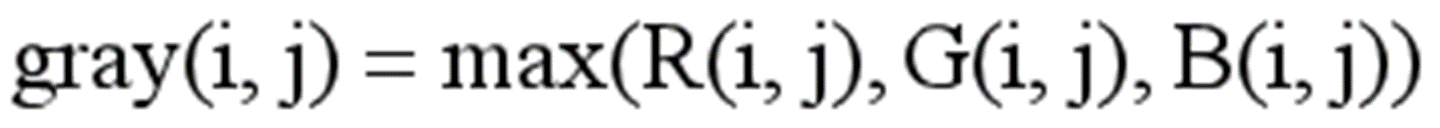

其方法灰度化处理后的灰度图
亮度很高，实现代码如下


In [ ]:
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

#读取原始图像
img = cv2.imread('test.jpg')

#获取图像高度和宽度
height = img.shape[0]
width = img.shape[1]

#创建一幅图像
grayimg = np.zeros((height, width, 3), np.uint8)

#图像最大值灰度处理
for i in range(height):
    for j in range(width):
        #获取图像R G B最大值
        gray = max(img[i,j][0], img[i,j][1], img[i,j][2])
        #灰度图像素赋值 gray=max(R,G,B)
        grayimg[i,j] = np.uint8(gray)

#显示图像
cv2.imshow("src", img)
cv2.imshow("gray", grayimg)

#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()


2.平均灰度处理方法

该方法的灰度值等于彩色图像R、G、B三个分量灰度值的求和平均值，其计算公式如下所示：


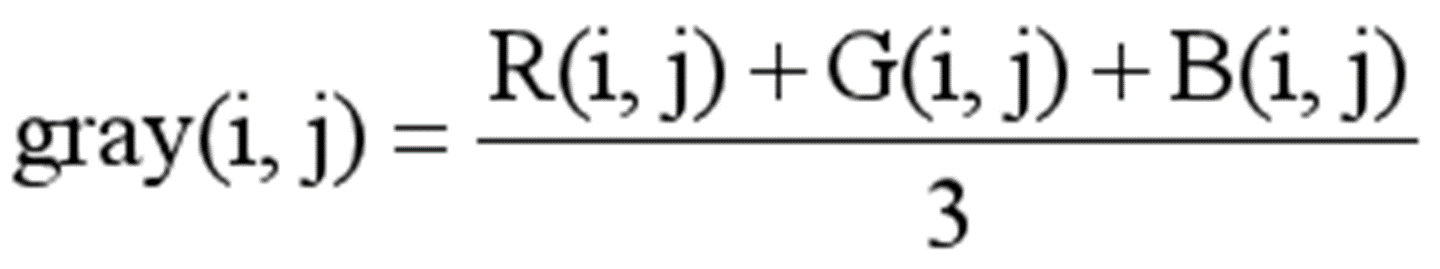

代码实现

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img  = cv2.imread('test.jpg')

height = img.shape[0]
width = img.shape[1]

grayimg = np.zeros((height, width, 3), np.uint8)

print(grayimg)

for i in range(height):
    for j in range(width):
        gray = (int(img[i,j][0]) + int(img[i,j][1]) + int(img[i,j][2])) / 3 
        grayimg[i,j] = np.uint8(gray)

#显示图像
cv2.imshow("src", img)
cv2.imshow("gray", grayimg)

#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()

                
        

## 14.3基于像素操作的图像灰度化处理

3.加权平均灰度处理方法

该方法根据色彩重要性，将三个分量以不同的权值进行加权平均。

由于人眼对绿色的敏感最高，对蓝色敏感最低，
因此，按下式对RGB三分量进行加权平均能得到较合理的灰度图像。


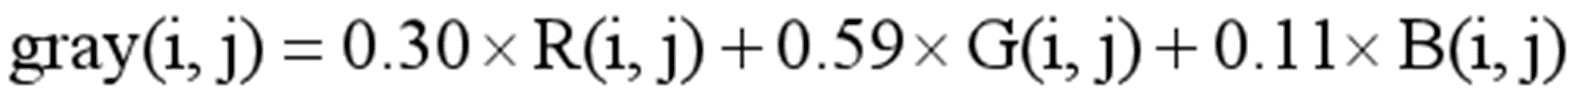

加权平均灰度处理方法
实现代码如下所示：


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img  = cv2.imread('test.jpg')

height = img.shape[0]
width = img.shape[1]

grayimg = np.zeros((height, width, 3), np.uint8)

print(grayimg)

for i in range(height):
    for j in range(width):
        gray = 0.30 * img[i,j][0] + 0.59 * img[i,j][1] + 0.11 * img[i,j][2]
        grayimg[i,j] = np.uint8(gray)

#显示图像
cv2.imshow("src", img)
cv2.imshow("gray", grayimg)

#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()
